In [6]:
import pandas as pd
import numpy as np

%store -r IF12021
IF12021

,Day,BZN|FR > BZN|GB [MW],BZN|GB > BZN|FR [MW]
0,01.01.2021 00:00 - 01.01.2021 01:00,NaN,NaN
1,02.01.2021 00:00 - 02.01.2021 01:00,NaN,NaN
2,03.01.2021 00:00 - 03.01.2021 01:00,NaN,NaN
3,04.01.2021 00:00 - 04.01.2021 01:00,NaN,NaN
4,05.01.2021 00:00 - 05.01.2021 01:00,NaN,NaN
...,...,...,...
360,27.12.2021 00:00 - 27.12.2021 01:00,18203.0,492.0
361,28.12.2021 00:00 - 28.12.2021 01:00,24491.0,0.0
362,29.12.2021 00:00 - 29.12.2021 01:00,14915.0,2454.0
363,30.12.2021 00:00 - 30.12.2021 01:00,13258.0,4417.0


In [7]:
%store -r IF12022
IF12022

,Day,BZN|FR > BZN|GB [MW],BZN|GB > BZN|FR [MW]
0,01.01.2022 00:00 - 01.01.2022 01:00,1810.0,11313.0
1,02.01.2022 00:00 - 02.01.2022 01:00,5447.0,8113.0
2,03.01.2022 00:00 - 03.01.2022 01:00,9309.0,10496.0
3,04.01.2022 00:00 - 04.01.2022 01:00,15671.0,0.0
4,05.01.2022 00:00 - 05.01.2022 01:00,16271.0,875.0
...,...,...,...
360,27.12.2022 00:00 - 27.12.2022 01:00,18145.0,299.0
361,28.12.2022 00:00 - 28.12.2022 01:00,17089.0,1316.0
362,29.12.2022 00:00 - 29.12.2022 01:00,13288.0,5611.0
363,30.12.2022 00:00 - 30.12.2022 01:00,12614.0,4933.0


In [8]:
IF1Flows = pd.concat([IF12021["BZN|FR > BZN|GB [MW]"], IF12022["BZN|FR > BZN|GB [MW]"]], ignore_index=True).to_frame("BZN|FR > BZN|GB [MW]")
IF1Flows["BZN|GB > BZN|FR [MW]"] = pd.concat([IF12021["BZN|GB > BZN|FR [MW]"], IF12022["BZN|GB > BZN|FR [MW]"]], ignore_index=True).to_frame("BZN|GB > BZN|FR [MW]")

IF1Flows["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "BZN|FR > BZN|GB [MW]", "BZN|GB > BZN|FR [MW]"]

IF1Flows = IF1Flows.reindex(columns=NewOrder)

IF1Flows

,Date,BZN|FR > BZN|GB [MW],BZN|GB > BZN|FR [MW]
0,2021-01-01,NaN,NaN
1,2021-01-02,NaN,NaN
2,2021-01-03,NaN,NaN
3,2021-01-04,NaN,NaN
4,2021-01-05,NaN,NaN
...,...,...,...
725,2022-12-27,18145.0,299.0
726,2022-12-28,17089.0,1316.0
727,2022-12-29,13288.0,5611.0
728,2022-12-30,12614.0,4933.0


(18643.0, 19391.0)


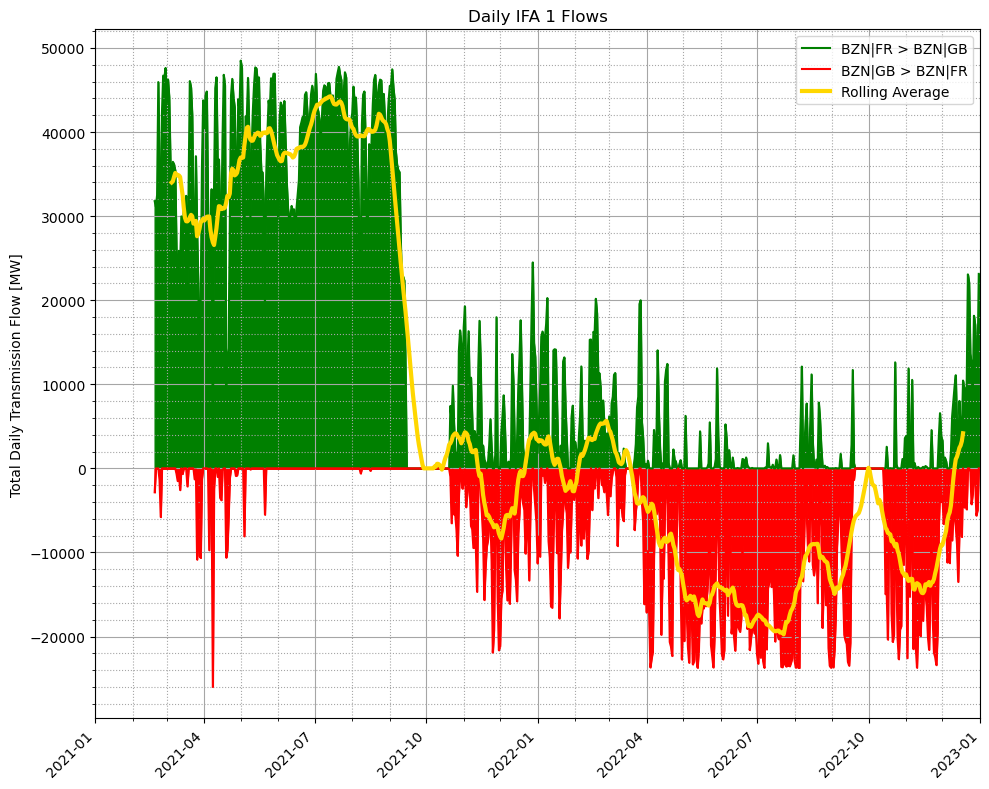

In [9]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Daily IFA 1 Flows')
plt.ylabel('Total Daily Transmission Flow [MW]')

Mean = (IF1Flows["BZN|FR > BZN|GB [MW]"] - IF1Flows["BZN|GB > BZN|FR [MW]"])/2
Sum = IF1Flows["BZN|FR > BZN|GB [MW]"] - IF1Flows["BZN|GB > BZN|FR [MW]"]

ax.plot(IF1Flows["Date"], IF1Flows["BZN|FR > BZN|GB [MW]"], color="green", label="BZN|FR > BZN|GB")
ax.plot(IF1Flows["Date"], -IF1Flows["BZN|GB > BZN|FR [MW]"], color="red", label="BZN|GB > BZN|FR")
ax.plot(IF1Flows["Date"], Sum.rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="Rolling Average")


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_xlim())

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.tight_layout()

plt.fill_between(IF1Flows["Date"], IF1Flows["BZN|FR > BZN|GB [MW]"], color="green")
plt.fill_between(IF1Flows["Date"], -IF1Flows["BZN|GB > BZN|FR [MW]"], color="red")

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

In [10]:
%store IF1Flows
del IF1Flows

Stored 'IF1Flows' (DataFrame)
